EDA de los datos de Accidentes viales en CABA, Argentina:

In [290]:
# Librerías necesarias
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
# Abrir archivos .csv HOMICIDIOS GENERAL
data_homicidios_gral = pd.read_csv("df_homic_lista.csv")

In [292]:
# Abrir archivos .csv HOMICIOS ESPECÍFICOS
data_homicidios_espec = pd.read_csv("espec_homicid.csv")

In [293]:
# Abrir archivos .csv LESIONADOS GENERAL
data_lesionados_gral = pd.read_csv("df_les_lista.csv")

In [294]:
# Abrir archivos .csv LESIONADOS ESPECÍFICOS
data_lesionados_espec = pd.read_csv("espec_lesion.csv")

In [295]:
data_homicidios_gral.head(2)

,Unnamed: 0,ID,N_VICTIMAS,Agno,Mes,Día,franja_hora_new,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",0,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [296]:
data_homicidios_espec.head(2)

,Unnamed: 0,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,Agno_fallec,Mes_fallec,Día_fallec
0,0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016,1,1
1,1,2016-0002,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016,1,2


In [297]:
data_lesionados_gral.head(2)

,Unnamed: 0,id,n_victimas,agno,mes,dia,franja_hora_new,comuna,geocodificacion_CABA,longitud,latitud,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,0,LC-2019-0000179,1,2019,1,1,9,14,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,0,0,0,0,1,SD
1,1,LC-2019-0000053,1,2019,1,1,1,8,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,0,1,0,0,0,SD


In [298]:
data_lesionados_espec.head(2)

,Unnamed: 0,ID hecho,AAA,MM,DD,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,0,LC-2019-0000053,2019,1,1,SD,MASCULINO,57,SD
1,1,LC-2019-0000063,2019,1,1,SD,SD,0,SD


In [299]:
# Fallecidos por año, cuántos años existen en la columna de Año_fallecido?
data_homicidios_espec["Agno_fallec"].unique()

array([2016, 1970, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [300]:
# Fallecidos por año, suma total
data_homicidios_espec["Agno_fallec"].count()

717

In [301]:
# Agrupa los datos por año y cuenta el número de registros en cada grupo
fallecidos_por_año = data_homicidios_espec["Agno_fallec"].groupby(data_homicidios_espec["Agno_fallec"]).size()

<Axes: title={'center': 'Fallecidos por Año'}, xlabel='Año', ylabel='Número de fallecidos'>

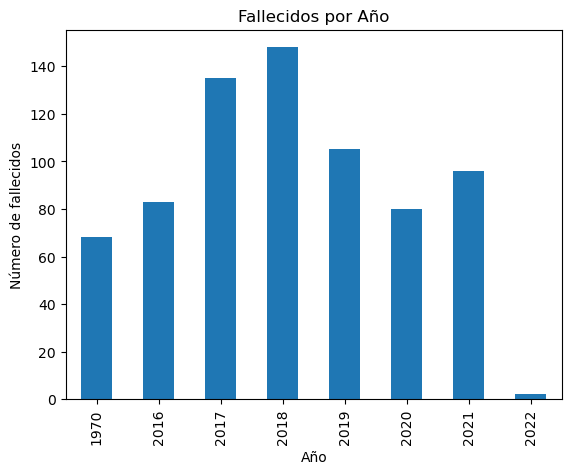

In [302]:
# Crea el gráfico de barras para mostrar el número de fallecidos por año
fallecidos_por_año.plot(kind="bar", xlabel="Año", ylabel="Número de fallecidos", title="Fallecidos por Año")

In [303]:
# Agrupa los datos por sexo y año de fallecimiento
agrupado_sexo_fall = data_homicidios_espec.groupby(["SEXO", "Agno_fallec"]).size()

In [304]:
agrupado_sexo_fall

SEXO       Agno_fallec
FEMENINO   1970            15
           2016            12
           2017            36
           2018            38
           2019            27
           2020            15
           2021            23
MASCULINO  1970            47
           2016            71
           2017            99
           2018           110
           2019            78
           2020            65
           2021            73
           2022             2
SD         1970             6
dtype: int64

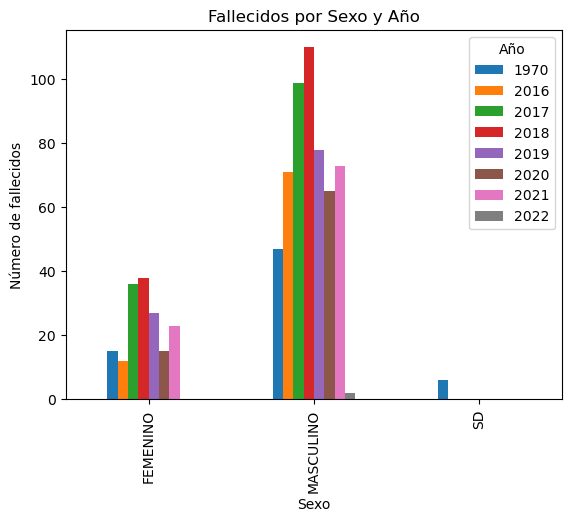

In [305]:
# Crea un gráfico de barras para mostrar el número de fallecidos por sexo y año
agrupado_sexo_fall.unstack().plot(kind="bar", xlabel="Sexo", ylabel="Número de fallecidos", title="Fallecidos por Sexo y Año")
plt.legend(title="Año")
plt.show()

In [306]:
# Lesionados por año, cuántos años existen en la columna de Año_lesionado?
# Lesionados por año
data_lesionados_espec["AAA"].unique()

array([2019, 2020, 2021], dtype=int64)

In [307]:
# Lesionados por año, suma total
data_lesionados_espec["AAA"].count()

27605

In [308]:
# Agrupa los datos por año y cuenta el número de registros en cada grupo
lesionados_por_año = data_lesionados_espec["AAA"].groupby(data_lesionados_espec["AAA"]).size()

In [309]:
lesionados_por_año

AAA
2019    11793
2020     6855
2021     8957
Name: AAA, dtype: int64

<Axes: title={'center': 'Lesionados por Año'}, xlabel='Año', ylabel='Número de lesionados'>

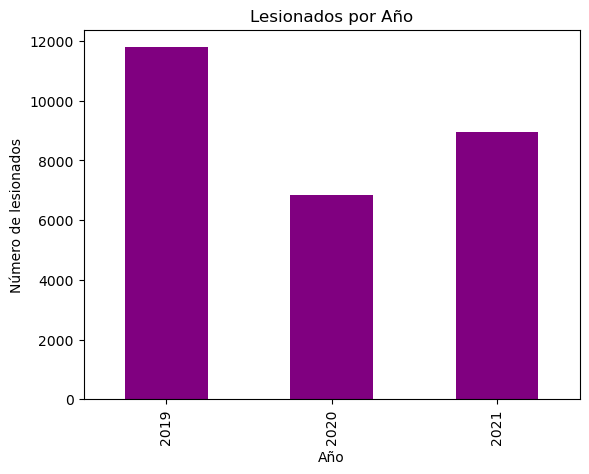

In [310]:
# Crea el gráfico de barras para mostrar el número de lesionados por año
lesionados_por_año.plot(kind="bar", xlabel="Año", ylabel="Número de lesionados", title="Lesionados por Año", color= "purple")

In [311]:
# Agrupa los datos por sexo y año de fallecimiento
agrupado_sexo_lesion = data_lesionados_espec.groupby(["SEXO", "AAA"]).size()

In [312]:
agrupado_sexo_lesion

SEXO       AAA 
FEMENINO   2019    3872
           2020    1775
           2021    2708
MASCULINO  2019    7530
           2020    4146
           2021    5346
SD         2019     391
           2020     934
           2021     903
dtype: int64

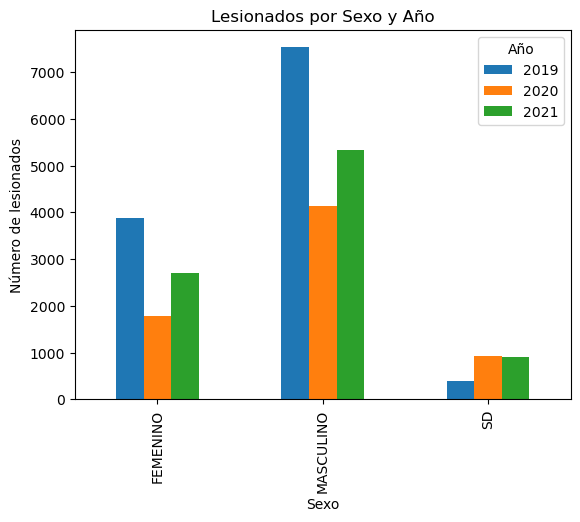

In [313]:
# Crea un gráfico de barras para mostrar el número de fallecidos por sexo y año
agrupado_sexo_lesion.unstack().plot(kind="bar", xlabel="Sexo", ylabel="Número de lesionados", title="Lesionados por Sexo y Año")
plt.legend(title="Año")
plt.show()